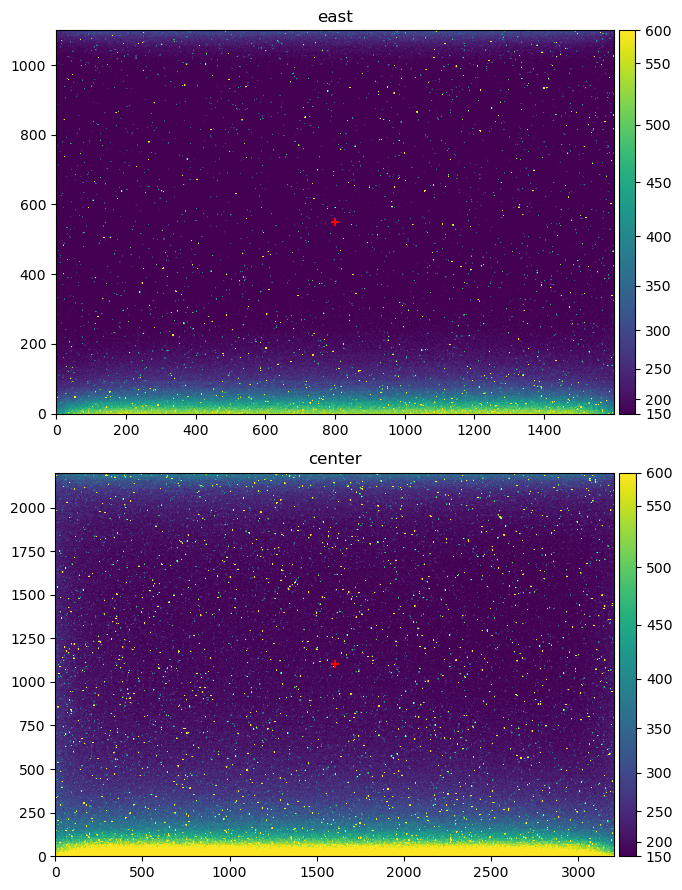

CancelledError: 

In [6]:
#%matplotlib widget
%matplotlib inline 

import asyncio

from cluplus.proxy import invoke

from lvmtipo.actors import lvm
from lvmagp.images import Image
from plotimg import plot_images

from IPython.display import clear_output

await lvm.sci.foc.start()
await lvm.sci.foc.status()
await lvm.sci.pwi.start()
await lvm.sci.pwi.setConnected(True, statusTick=1.0)

await lvm.sci.pwi.status()

await lvm.sci.agc.start()

exptime = 10

while True:
    rc = await lvm.sci.agc.expose( exptime)
    filenames = rc.flatten().unpack("*.filename")
    print(filenames)
    clear_output()
    images = [Image.from_file(f) for f in filenames]
    plot_images(images)
    print()


In [3]:
touple_list = [(i.data, i.header) for i in images]

In [4]:
import reproject
from reproject.mosaicking import find_optimal_celestial_wcs

wcs_out, shape_out= reproject.mosaicking.find_optimal_celestial_wcs(touple_list)

reprojected_arrays = []
footprints = []
for index,touple in enumerate(touple_list):
    print(index)
    

    reprojected_array,current_footprint = reproject.reproject_interp(touple, wcs_out,shape_out=shape_out)
    reprojected_arrays.append(reprojected_array)
    footprints.append(current_footprint)

Set OBSGEO-B to   -29.010910 from OBSGEO-[XYZ].
Set OBSGEO-H to     2280.000 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -29.010910 from OBSGEO-[XYZ].
Set OBSGEO-H to     2280.000 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


0
1


Set OBSGEO-B to   -29.010910 from OBSGEO-[XYZ].
Set OBSGEO-H to     2280.000 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [5]:
img0 = Image.from_file(filenames[0])
img1 = Image.from_file(filenames[1])
#img0.header


imgsum = img0.copy()
imgsum.data -= img1.data

plot_images([imgsum])



ValueError: operands could not be broadcast together with shapes (1100,1600) (2200,3208) (1100,1600) 

In [ ]:
print(await lvm.sci.agc.reconnect())
print(await lvm.spec.agc.reconnect())

In [ ]:
%matplotlib inline

from cluplus.proxy import invoke
from lvmtipo.actors import lvm
from lvmagp.images import Image
from plotimg import plot_images

await lvm.spec.agc.start()
await lvm.skye.agc.start()
await lvm.spec.agc.reconnect()
await lvm.skye.agc.reconnect()

exptime = 5
rc = await invoke(lvm.skye.agc.expose(exptime), lvm.spec.agc.expose(exptime))
filenames = rc.flatten().unpack("*.filename")

print(filenames)
plot_images([Image.from_file(f) for f in filenames])

In [ ]:
import asyncio

await lvm.spec.agc.reconnect()

exptime=1.0
while True:
  await lvm.spec.agc.expose(exptime)
  await asyncio.sleep(0.5)

In [ ]:
ra_off_d = 60
dec_off_d = 0

await lvm.sci.pwi.offset(ra_add_arcsec = ra_off_d, dec_add_arcsec = dec_off_d)


In [ ]:
import asyncio

await lvm.sci.agc.start()
await lvm.sci.agc.reconnect()

exptime=5.000
for i in range(100):
#while True:
  filenames = (await lvm.sci.agc.expose(exptime)).flatten().unpack("*.filename")
  print(filenames)
  await asyncio.sleep(0.5)

In [ ]:
await lvm.sci.ag.start()
await lvm.sci.ag.guideStop()

In [ ]:
await lvm.sci.km.start()
await lvm.sci.km.slewStop()

In [ ]:
await lvm.sci.pwi.start()
ra, dec = (await lvm.sci.pwi.status()).flatten().unpack("ra_j2000_hours", "dec_j2000_degs")

await lvm.sci.km.slewStart(ra, dec)